## Test 2D + construction

In [36]:
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
from PIL import Image
import os
from PIL import Image
import PIL


In [37]:
image_data_dict = '/media/jan/DataStorage/ProjectData/temp/results_dataset_2_contrast_0/de1e8ea9ece4f31fd084e360927ab0d8'
dataset = os.path.join(image_data_dict, 'train_full.csv')

In [38]:
slice_list = pd.read_csv(dataset)
slice_list.head()

,Unnamed: 0,img,tgt,scan_id,slice_id,patient,source
0,0,/root/space/output/dataset_2_contrast_0/xVertS...,/root/space/output/dataset_2_contrast_0/xVertS...,xVertSeg_004,9,xVertSeg_000,xVertSeg
1,1,/root/space/output/dataset_2_contrast_0/xVertS...,/root/space/output/dataset_2_contrast_0/xVertS...,xVertSeg_004,397,xVertSeg_000,xVertSeg
2,2,/root/space/output/dataset_2_contrast_0/xVertS...,/root/space/output/dataset_2_contrast_0/xVertS...,xVertSeg_004,192,xVertSeg_000,xVertSeg
3,3,/root/space/output/dataset_2_contrast_0/xVertS...,/root/space/output/dataset_2_contrast_0/xVertS...,xVertSeg_004,183,xVertSeg_000,xVertSeg
4,4,/root/space/output/dataset_2_contrast_0/xVertS...,/root/space/output/dataset_2_contrast_0/xVertS...,xVertSeg_004,355,xVertSeg_000,xVertSeg


In [39]:
meta_image = slice_list.sample().to_dict(orient='records')[0]

In [40]:
queries = {name : 'scan_id == \"{}\" & patient == \"{}\" & slice_id == {}'.format(meta_image['scan_id'], meta_image['patient'], meta_image['slice_id'] + offset) for name, offset in zip(['top', 'bottom'], [1 * 5, -1 * 5])}
print(queries)
meta_top = slice_list.query(queries['top']).img.iloc[0]
meta_bottom = slice_list.query(queries['bottom']).img.iloc[0]

{'top': 'scan_id == "MyoSegmenTUM_042" & patient == "MyoSegmenTUM_000" & slice_id == 35', 'bottom': 'scan_id == "MyoSegmenTUM_042" & patient == "MyoSegmenTUM_000" & slice_id == 25'}


In [41]:
print(f'metadata image : {meta_image}\nmeta top :\t\t{meta_top}\nmeta bottom :\t\t{meta_bottom}')

metadata image : {'Unnamed: 0': 8465, 'img': '/root/space/output/dataset_2_contrast_0/MyoSegmenTUM_images/image042/slice_030.npy', 'tgt': '/root/space/output/dataset_2_contrast_0/MyoSegmenTUM_masks/image042/slice_030.npy', 'scan_id': 'MyoSegmenTUM_042', 'slice_id': 30, 'patient': 'MyoSegmenTUM_000', 'source': 'MyoSegmenTUM'}
meta top :		/root/space/output/dataset_2_contrast_0/MyoSegmenTUM_images/image042/slice_035.npy
meta bottom :		/root/space/output/dataset_2_contrast_0/MyoSegmenTUM_images/image042/slice_025.npy


Load the images

In [42]:
image = np.load(meta_image['img'].replace(r'/root/space/output/', r'/media/jan/DataStorage/ProjectData/temp/'))
top = np.load(meta_top.replace(r'/root/space/output/', r'/media/jan/DataStorage/ProjectData/temp/'))
bottom = np.load(meta_bottom.replace(r'/root/space/output/', r'/media/jan/DataStorage/ProjectData/temp/'))

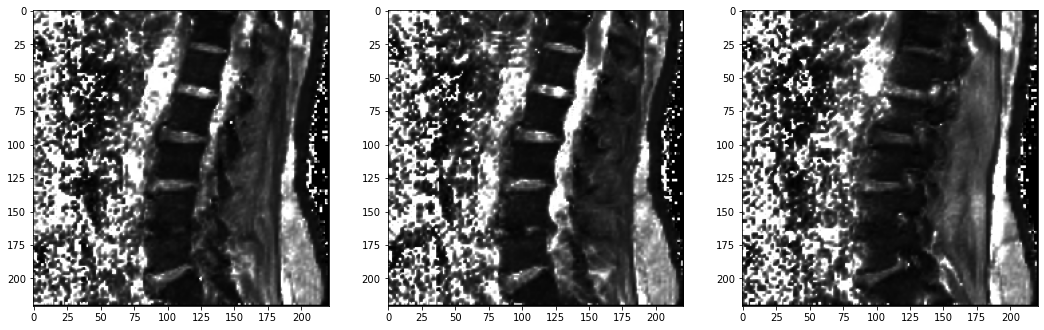

In [43]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize = (18,18))

ax0.imshow(Image.fromarray((image * 255).astype('uint8')).convert('RGB'))
ax1.imshow(Image.fromarray((top * 255).astype('uint8')).convert('RGB'))
ax2.imshow(Image.fromarray((bottom * 255).astype('uint8')).convert('RGB'))

In [44]:
layers = np.stack([top, image, bottom], axis=2)
print(f'image dimension: {image.shape} * top dimension : {top.shape} * bottom dimension : {bottom.shape} * combined dimension : {layers.shape}')

image dimension: (221, 221) * top dimension : (221, 221) * bottom dimension : (221, 221) * combined dimension : (221, 221, 3)


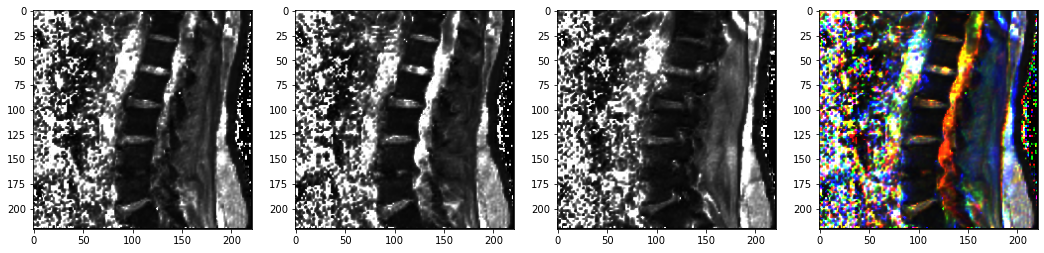

In [45]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize = (18,18))

ax0.imshow(Image.fromarray((image * 255).astype('uint8')).convert('RGB'))
ax1.imshow(Image.fromarray((top * 255).astype('uint8')).convert('RGB'))
ax2.imshow(Image.fromarray((bottom * 255).astype('uint8')).convert('RGB'))
ax3.imshow(Image.fromarray((layers * 255).astype('uint8')))

plt.figsave